Задача 2: Аналіз семантики товарів
Мета: Розробити систему для визначення емоційного відтінку та
виявлення цін у текстових коментарях.
Опис:
1. У нашій базі є інформація про числові оцінки товару з текстовим
коментарем. Потрібно створити алгоритм, який буде здатен
класифікувати коментар за емоційним забарвленням на
позитивний/негативний чи нейтральний.
2. Розробити підхід, який буде знаходити числове значення ціни з
будь якого коментаря. Ціни можуть бути зазначені у місцевій валюті
або доларах США

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Аналіз даних

In [319]:
order_reviews = pd.read_csv('S_Data/order_reviews.csv')

In [320]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [321]:
order_reviews.rename(columns={'review_comment_title': 'title',
                              'review_comment_message': 'comment',
                              'review_creation_date': 'creation_date'}, inplace=True)

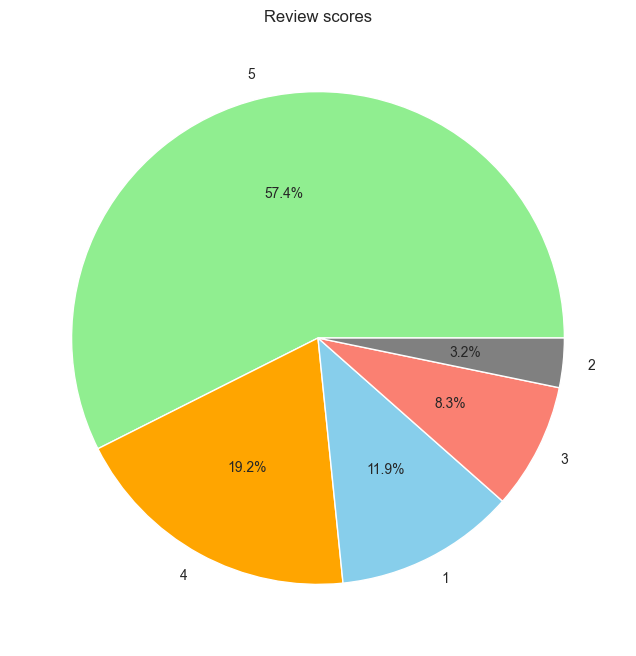

In [322]:
plt.figure(figsize=(8, 8))
order_reviews['review_score'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'skyblue', 'salmon', 'grey'])
plt.title('Review scores')
plt.ylabel('')
plt.show()

In [323]:
order_reviews['creation_date'] = pd.to_datetime(order_reviews['creation_date'])
order_reviews['month'] = order_reviews['creation_date'].dt.month

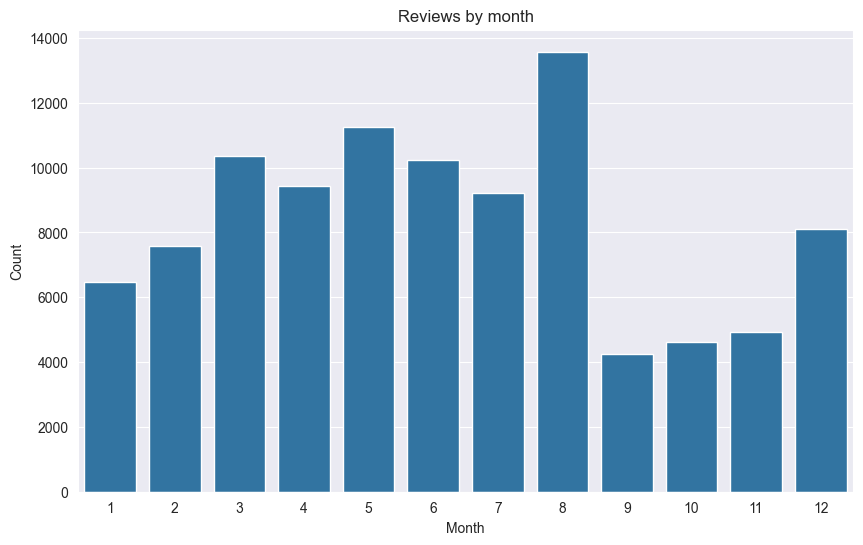

In [324]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=order_reviews)
plt.title('Reviews by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [325]:
order_reviews['title'] = order_reviews['title'].str.lower().str.strip()

order_reviews['title'].value_counts()

title
recomendo              914
super recomendo        607
ótimo                  497
bom                    472
excelente              430
                      ... 
nao recebi certo         1
lm 327                   1
compraria novamente      1
irritante                1
foto enganosa            1
Name: count, Length: 3740, dtype: int64

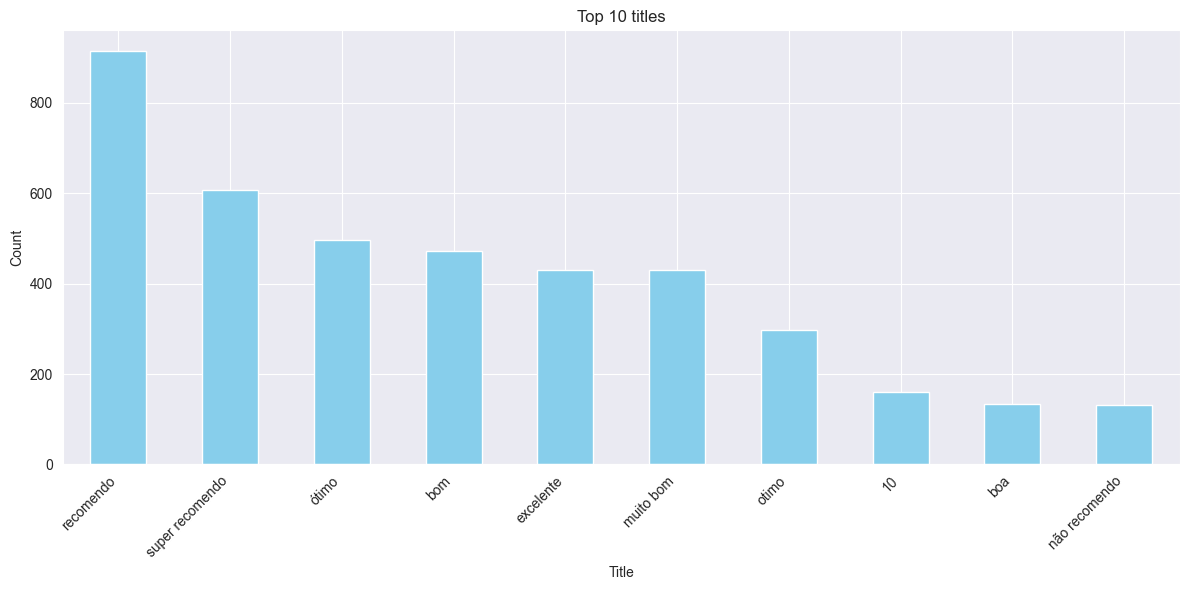

In [326]:
# Отримання топ-10 заголовків 
top_10_titles = order_reviews['title'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_titles.plot(kind='bar', color='skyblue')
plt.title('Top 10 titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Попередня обробка тексту

In [327]:
# Видаляємо рядки без коментарів
cleaned_reviews = order_reviews.dropna(subset=['comment'], inplace=False).copy()

cleaned_reviews

,review_id,order_id,review_score,title,comment,creation_date,review_answer_timestamp,month
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,4
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,3
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,5
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,2
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,5
...,...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23,2
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19,2018-05-20 21:51:06,5
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,3
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15,2017-12-16 01:29:43,12


In [328]:
def preprocess_text(text):
    return text.lower().strip()


In [329]:
cleaned_reviews['comment'] = cleaned_reviews['comment'].apply(preprocess_text)
cleaned_reviews['comment']

3                    recebi bem antes do prazo estipulado.
4        parabéns lojas lannister adorei comprar pela i...
9        aparelho eficiente. no site a marca do aparelh...
12             mas um pouco ,travando...pelo valor ta boa.
15       vendedor confiável, produto ok e entrega antes...
                               ...                        
99983    entregou dentro do prazo. o produto chegou em ...
99990    o produto não foi enviado com nf, não existe v...
99996    excelente mochila, entrega super rápida. super...
99998    solicitei a compra de uma capa de retrovisor c...
99999    meu produto chegou e ja tenho que devolver, po...
Name: comment, Length: 41753, dtype: object

Класифікація настроїв

Використаємо натреновану модель з модулю transformers для класифікації настроїв

In [330]:
from transformers import pipeline

# Завантаження моделі
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment', device='cpu')


def convert_sentiment(label):
    if label in ['1 star', '2 stars']:
        return 'Negative'
    elif label == '3 stars':
        return 'Neutral'
    else:
        return 'Positive'


def analyze_sentiment(comment: str, print_: bool=True):
    result = classifier(comment)
    stars, score = result[0]['label'], result[0]['score']
    sentiment = convert_sentiment(stars)
    
    if print_:
        print(f"Comment: {comment}"
              f"\nSentiment: {sentiment} ({stars}, {score})\n")
    
    return sentiment

In [331]:
# Запустимо модель на тестовому наборі даних

test_comments = [
    'Vendedor confiável, produto ok e entrega antes do prazo.', # Надійний продавець, хороший товар і доставка вчасно
    'É um produto ok, nada de especial.',                       # Хороший продукт, нічого особливого.
    'Não gostei ! Comprei gato por lebre',                      # Не сподобалось! Купив порося в мішку
]

for comment in test_comments:
    analyze_sentiment(comment)

Comment: Vendedor confiável, produto ok e entrega antes do prazo.
Sentiment: Positive (4 stars, 0.4709451198577881)

Comment: É um produto ok, nada de especial.
Sentiment: Neutral (3 stars, 0.6013073325157166)

Comment: Não gostei ! Comprei gato por lebre
Sentiment: Negative (1 star, 0.5860903859138489)



In [332]:
# Проаналізуємо перших 10 коментарів
for comment in cleaned_reviews['comment'][:10]:
    analyze_sentiment(comment)

Comment: recebi bem antes do prazo estipulado.
Sentiment: Neutral (3 stars, 0.3998761475086212)

Comment: parabéns lojas lannister adorei comprar pela internet seguro e prático parabéns a todos feliz páscoa
Sentiment: Positive (5 stars, 0.5380740761756897)

Comment: aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
Sentiment: Neutral (3 stars, 0.36108896136283875)

Comment: mas um pouco ,travando...pelo valor ta boa.
Sentiment: Neutral (3 stars, 0.6547532081604004)

Comment: vendedor confiável, produto ok e entrega antes do prazo.
Sentiment: Positive (4 stars, 0.4709451198577881)

Comment: gostaria de saber o que houve, sempre recebi e essa compra agora me decpcionou
Sentiment: Negative (1 star, 0.36002612113952637)

Comment: péssimo
Sentiment: Negative (1 star, 0.9557668566703796)

Comment: loja nota 10
Sentiment: Positive (5 stars, 0.4426158666610718)

Comment:

In [333]:
def analyze_comments(comment_series):
    return [analyze_sentiment(comment, print_=False) for comment in comment_series]


sentiments_list = analyze_comments(cleaned_reviews['comment'][:1000])

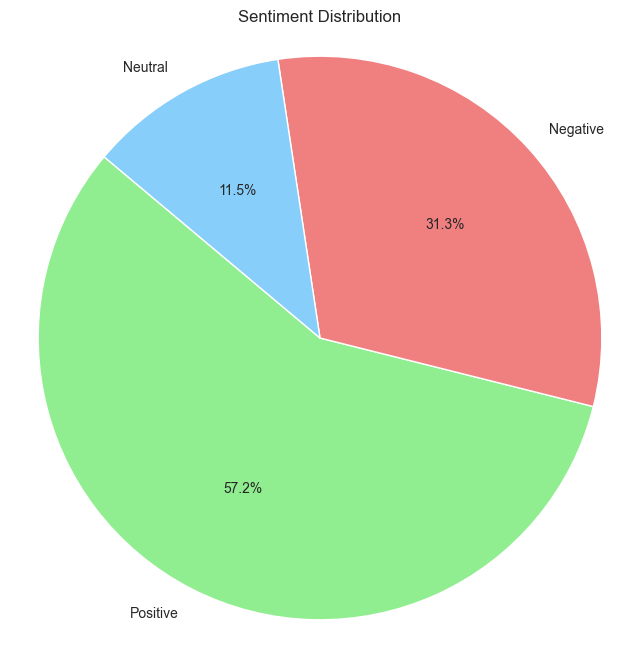

In [334]:
sentiment_counts = pd.Series(sentiments_list).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'], startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

Знаходження ціни з коментарів

In [335]:
import re


def extract_price(comment):
    # Регулярний вираз для знаходження цін 
    price_pattern = re.compile(r'(?<!\w)(?:R\$|r\$|\$)\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})')
    
    # Знаходження всіх збігів у коментарі
    matches = price_pattern.findall(comment)
    
    if matches:
        return matches[0]
    

In [336]:
test_money_comments = [
        'Este produto custa $10.50 e é ótimo! $15',
        'Preço: r$20,30 reais, não gostei.',
        'Custa R$ 45.13 , muito caro.'
    ]


In [337]:
for comm in test_money_comments:
    print(extract_price(comm))

$10.50
r$20,30
R$ 45.13


In [338]:
comments_with_digits = cleaned_reviews[cleaned_reviews['comment'].str.contains('\d+')]
comments_with_digits

,review_id,order_id,review_score,title,comment,creation_date,review_answer_timestamp,month
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,5
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,ótimo,loja nota 10,2018-07-10,2018-07-11 14:10:25,7
51,e233e51d11511bf30e568c76360ace52,548df2c6e5f089574614894bca78acf5,1,NaN,recebi somente 1 controle midea split estilo.\...,2018-01-28,2018-02-04 11:06:15,1
115,ae728c1061bf163b4bd256ad9ee0bb83,45c780334bc32cb77559a65c5f171160,1,NaN,este foi o pedido\r\nbalde com 128 peças - blo...,2018-01-04,2018-01-10 09:52:57,1
168,d7ea05bb4f9c77d606fd90b1a27e317d,bb5b0d8f3e9c964760c674f2aa2ae0cf,1,NaN,comprei o produto dia 25 de fevereiro e hoje d...,2018-03-29,2018-03-29 23:13:58,3
...,...,...,...,...,...,...,...,...
99843,970ae7c9df61910a0a30c38670db7ae5,b7e332393b5e64cdc10d308c971a41c4,3,NaN,teve um probleminha minha pasta multiuso pra n...,2018-08-28,2018-08-30 16:53:31,8
99916,9ed2a6bc2282fd2b0105055631afa57f,a7db1b7bfec5e83a8fd33625e99f0d15,1,NaN,ate hoje dia 21/10/2017 o pedido não foi entre...,2017-10-21,2017-10-21 18:51:37,10
99930,2fc8295a24978092328d3a329d22940e,e809c167a9cfd31aee1293abe8995065,1,NaN,eu recebi o seguinte email e preciso saber com...,2018-02-09,2018-02-13 13:03:24,2
99972,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,não foi entregue o pedido,bom dia \r\ndas 6 unidades compradas só recebi...,2018-06-05,2018-06-06 10:52:19,6


In [339]:
data = '\n'.join(comments_with_digits['comment'][500:1500])

with open('data.txt', 'w', encoding='utf-8') as f:
    f.write(data)

In [340]:
for comm in comments_with_digits['comment']:
    price = extract_price(comm)
    if price:
        print(comm)
        print(f'Price: {price}')
        print()

este foi o pedido
balde com 128 peças - blocos de montar 2 un - r$ 25,00 cada (não foi entregue)
vendido e entregue targaryen
tapete de eva nº letras 36 peças crianças 1 un - r$ 35,90 (este foi entreg
Price: r$ 25,00

comprei 4 produtos, sendo que só recebi 3. faltou um lençol branco sem elástico. foi quase r$ 100,00. e como eu fico? no prejuizo?
Price: r$ 100,00

relógio belíssimo, muito elegante, inacreditável diante do valor de menos de r$ 150,00! veio muito bem embrulhado e protegido, fora que tem também caixa muito chique, como se fosse jóia!!! recomendo
Price: r$ 150,00

entrega super rápida. quanto ao produto, não gostei tanto, imaginei que seria melhor e mais bonito, se tivesse visto em uma loja, pegado em mãos antes não teria pagado r$21,90 não, mas ok.
Price: r$21,90

pedi hd 500 gb sata notebook samsung r520

1 unidade - r$ 269,00 cada

 
e recebi hdd 2,5 notebook / desktop seagate st500lm030 barracuda 500gb 5400rpm 128mb sata 6gb/s
Price: r$ 269,00

pagamos caro para recebe